<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Assignment 6
</p><br>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Due on: April 21th, 11:59PM
</p><br>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
App Ratings at Google Playstore </p><br>
In this assignment, we intend to build prediction models of App ratings based on data about Apps in the Google Playstore. <br>
The variables in the dataset are as follows:

Category: application category 

Rating: overall user rating of the app as when scraped 

Reviews: number of user reviews for the app as when scraped

Size: size of the app as when scraped 

Installs: number of user downloads/installs for the app as when scraped 

Type: paid or free 

Price: Price of the app 

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For eg, 
a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store (as when scraped)

Current Ver: Current version of the app available on Play Store (as when scraped)

Android Ver: Min required Android version (as when scraped)


### The steps:
1. Data Preparation: we transform variables so that they have proper data type and values for analysis.
2. Data exploration: we use summary statistics and graphs to examine variable distributions and their relationships.
3. Modeling: we apply two different methods: linear regression and decision tree and compare their performance.

Import libraries. It is important that you have all the tools you need by importing them first.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the data set. Pay attention to your directory.

In [3]:
gostore = pd.read_csv('googleplaystore.csv')
gostore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0+,Free,0,Everyone,Art & Design,14-Mar-17,4,4.2 and up
1,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
2,Dp for girls,ART_AND_DESIGN,4.2,175,8.2M,"50,000+",Free,0,Everyone,Art & Design,26-May-17,1.2,4.0.3 and up
3,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,4.2M,"100,000+",Free,0,Everyone,Art & Design,22-Aug-17,1,2.3 and up
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up


Get the basic information about the dataset: shape and info(). What are the datatypes for Installs, Size and Price?

In [4]:
gostore.shape
gostore.columns
gostore.info()

(10841, 13)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


## Data preparation
1. Check variable "Installs". Remove ',' and '+' and change it to integer

In [5]:
gostore['Installs'].unique()
gostore['Installs'] = gostore['Installs'].str.replace(',','')
gostore['Installs'] = gostore['Installs'].str.replace('+','')
gostore.head()
# Cast it back to integer
gostore['Installs'] = gostore['Installs'].apply(lambda x: int(x))
# Or we can use astype() function to cast
# astype()

array(['0+', '50,000+', '100,000+', '1,000,000+', '500,000+', '10,000+',
       '5,000+', '1,000+', '10,000,000+', '100+', '50,000,000+',
       '5,000,000+', '10+', '500+', '1+', '5+', '50+', '100,000,000+',
       '1,000,000,000+', '500,000,000+', '0'], dtype=object)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0,Free,0,Everyone,Art & Design,14-Mar-17,4,4.2 and up
1,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
2,Dp for girls,ART_AND_DESIGN,4.2,175,8.2M,50000,Free,0,Everyone,Art & Design,26-May-17,1.2,4.0.3 and up
3,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,4.2M,100000,Free,0,Everyone,Art & Design,22-Aug-17,1,2.3 and up
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000,Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up


2. Change “Size” into numeric (deleting ‘k’ or ‘M’ at the end and multiply it with 1000 or 1000,000). For any entry other than 'k' or 'M' endings, substitute with 'nan'.

In [6]:
gostore['Size'].unique()
def sizefunc(sizestr):
    if sizestr.endswith('K'):
        size = float(sizestr.strip('K'))*1000
    elif sizestr.endswith("M"):
        size = float(sizestr.strip('M'))*10e6
    else:
        size = np.nan
    return size

gostore['Size'] = gostore['Size'].apply(sizefunc)

array(['1.2M', '5.6M', '8.2M', '4.2M', '33M', '25M', '28M', '3.7M', '17M',
       '26M', '11M', '8.0M', '12M', '7.7M', '19M', '14M', '7.0M', '1.9M',
       '6.1M', '3.6M', '4.5M', '9.4M', '20M', '10M', '2.9M', '6.0M',
       '7.9M', '5.2M', '2.7M', '29M', '2.8M', '21M', '8.6M', '3.1M',
       '23M', '9.2M', '4.6M', 'Varies with device', '15M', '5.9M', '31M',
       '4.4M', '3.5M', '5.5M', '24M', '8.7M', '37M', '39M', '201k',
       '2.5M', '58M', '66M', '1.7M', '6.5M', '27M', '97M', '88M', '885k',
       '2.2M', '8.4M', '1.1M', '9.0M', '13M', '8.9M', '34M', '2.4M',
       '3.4M', '6.3M', '6.6M', '16M', '3.9M', '48M', '5.7M', '38M',
       '5.4M', '18M', '32M', '56M', '57M', '35M', '54M', '4.8M', '42M',
       '2.6M', '9.9M', '52M', '30M', '9.8M', '6.4M', '7.1M', '3.2M',
       '22M', '7.4M', '6.7M', '93k', '754k', '942k', '970k', '619k',
       '1.4M', '4.9M', '9.1M', '688k', '7.3M', '9.3M', '8.8M', '8.5M',
       '7.2M', '2.1M', '4.1M', '50M', '9.7M', '45M', '4.0M', '4.3M',
       '65

Impute the missing values with the sample mean of Size.

In [7]:
gostore['Size'] = gostore['Size'].fillna(gostore['Size'].mean())
gostore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Test Application DT 02,ART_AND_DESIGN,NaN,0,12000000.0,0,Free,0,Everyone,Art & Design,14-Mar-17,4,4.2 and up
1,Paper flowers instructions,ART_AND_DESIGN,4.4,167,56000000.0,50000,Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
2,Dp for girls,ART_AND_DESIGN,4.2,175,82000000.0,50000,Free,0,Everyone,Art & Design,26-May-17,1.2,4.0.3 and up
3,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,42000000.0,100000,Free,0,Everyone,Art & Design,22-Aug-17,1,2.3 and up
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,330000000.0,1000000,Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up


2. Check variable "Price". There is a dollar sign in front of the numerical value and empty space ' ' at the end of some values Strip the empty space ' ' at the end, delete the dollar sign and change it to numbers.

In [8]:
gostore['Price'].unique()
# Remove a dollar sign in front of the numerical value
gostore['Price'] = gostore['Price'].str.replace('$', '')
# The space at the end
gostore['Price'] = gostore['Price'].str.strip(' ')
gostore['Price'] = gostore['Price'].astype(float)
gostore.head()

array(['0', '$1.99 ', '$9.99 ', '$1.49 ', '$0.99 ', '$1.96 ', '$5.49 ',
       '$5.99 ', '$2.99 ', '$6.49 ', '$1.75 ', '$3.08 ', '$3.99 ',
       '$3.61 ', '$4.60 ', '$4.49 ', '$2.49 ', '$19.90 ', '$12.99 ',
       '$89.99 ', '$4.99 ', '$17.99 ', '$8.99 ', '$2.90 ', '$19.99 ',
       '$7.99 ', '$6.99 ', '$109.99 ', '$1.26 ', '$1.04 ', '$4.84 ',
       '$39.99 ', '$2.00 ', '$29.99 ', '$10.00 ', '$46.99 ', '$14.99 ',
       '$13.99 ', '$399.99 ', '$19.40 ', '$10.99 ', '$7.49 ', '$1.20 ',
       '$389.99 ', '$1.59 ', '$4.77 ', '$30.99 ', '$18.99 ', '$394.99 ',
       '$28.99 ', '$3.49 ', '$16.99 ', '$1.61 ', '$14.00 ', '$3.04 ',
       '$37.99 ', '$400.00 ', '$379.99 ', '$299.99 ', '$11.99 ', '$5.00 ',
       '$1.50 ', '$15.46 ', '$200.00 ', '$1.00 ', '$24.99 ', '$33.99 ',
       '$15.99 ', '$79.99 ', '$74.99 ', '$9.00 ', '$4.59 ', '$4.85 ',
       '$1.70 ', '$3.95 ', '$1.29 ', '$2.60 ', '$4.29 ', '$8.49 ',
       '$154.99 ', '$3.88 ', '$4.80 ', '$3.02 ', '$1.97 ', '$2.59 ',
       '$3.28

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Test Application DT 02,ART_AND_DESIGN,NaN,0,12000000.0,0,Free,0.0,Everyone,Art & Design,14-Mar-17,4,4.2 and up
1,Paper flowers instructions,ART_AND_DESIGN,4.4,167,56000000.0,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
2,Dp for girls,ART_AND_DESIGN,4.2,175,82000000.0,50000,Free,0.0,Everyone,Art & Design,26-May-17,1.2,4.0.3 and up
3,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,42000000.0,100000,Free,0.0,Everyone,Art & Design,22-Aug-17,1,2.3 and up
4,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,330000000.0,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up


In [9]:
gostore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


### Here starts questions for Assignment 6

We need to continue the data cleaning with variables: category, last updated and Android version.

#### Category
There are a total of 33 categories of apps. To reduce dimensions, we can reassign them into eight broader categories. They are TOOLS, SOCIAL_AND_ENTERTAINMENT, BUSINESS, TRANSPORTATION, MEDIA, LIFESTYLE, FAMILY, and GAME, respectively (Family and Game are kept from original categories).

In [10]:
gostore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER', nan], dtype=object)

In [11]:
gostore['Category'] = gostore['Category'].replace(['ART_AND_DESIGN', 'TOOLS', 'PRODUCTIVITY', 
                                                  'WEATHER', 'LIBRARIES_AND_DEMO', 'PHOTOGRAPHY',
                                                  'PERSONALIZATION', 'LIBRARIES_AND_DEMO'], 
                                                  'TOOLS')

gostore['Category'] = gostore['Category'].replace( ['SOCIAL', 'COMMUNICATION', 'SHOPPING', 'ENTERTAINMENT', 'DATING', 'EVENTS'], 
                                                  'SOCIAL_AND_ENTERTAINMENT')

gostore['Category'] = gostore['Category'].replace( ['BUSINESS', 'FINANCE'], 
                                                  'BUSINESS')

gostore['Category'] = gostore['Category'].replace( ['TRAVEL_AND_LOCAL', 'MAPS_AND_NAVIGATION'], 
                                                  'TRANSPORTATION')

gostore['Category'] = gostore['Category'].replace( ['NEWS_AND_MAGAZINES', 'VIDEO_PLAYERS', 'BOOKS_AND_REFERENCE', 'COMICS'], 
                                                  'MEDIA')

gostore['Category'] = gostore['Category'].replace( ['MEDICAL', 'SPORTS', 'LIFESTYLE', 'HEALTH_AND_FITNESS', 'EDUCATION',
                                                   'FOOD_AND_DRINK', 'HOUSE_AND_HOME', 'AUTO_AND_VEHICLES', 'PARENTING', 'BEAUTY'], 
                                                  'LIFESTYLE')
gostore['Category'].unique()

array(['TOOLS', 'LIFESTYLE', 'MEDIA', 'BUSINESS',
       'SOCIAL_AND_ENTERTAINMENT', 'FAMILY', 'GAME', 'TRANSPORTATION',
       nan], dtype=object)

#### Last Updated
We can generate a 'Recency' variable based on the time of last updated. The most recent updates recorded as in Sept 2016 and the data was created in Kaggle on 09/04/2018. So we calculate the time difference in days between 09/04/2018 and the date an app was last updated.

In [12]:
# the difference between last updated and 09/04/2018 can be caculated
# 1. Get the date of the last updated column by getting the date attribute using DateTimeIndex().
gostore['date'] = pd.DatetimeIndex(gostore['Last Updated'])
gostore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,date
0,Test Application DT 02,TOOLS,NaN,0,12000000.0,0,Free,0.0,Everyone,Art & Design,14-Mar-17,4,4.2 and up,2017-03-14
1,Paper flowers instructions,TOOLS,4.4,167,56000000.0,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up,2017-03-26
2,Dp for girls,TOOLS,4.2,175,82000000.0,50000,Free,0.0,Everyone,Art & Design,26-May-17,1.2,4.0.3 and up,2017-05-26
3,Easy Realistic Drawing Tutorial,TOOLS,4.1,223,42000000.0,100000,Free,0.0,Everyone,Art & Design,22-Aug-17,1,2.3 and up,2017-08-22
4,Garden Coloring Book,TOOLS,4.4,13791,330000000.0,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up,2017-09-20


In [13]:
# 2. Create a datetime object for 09/04/2018
s = pd.to_datetime('9/4/2018')
s

Timestamp('2018-09-04 00:00:00')

In [14]:
# 3. The difference between dates can be calculated using '-'; Note that the substration applies broadcasting
# Use .days attribute to get the number of days 
gostore['Recency'] = (s - gostore['date']).dt.days
gostore.head()
gostore.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,date,Recency
0,Test Application DT 02,TOOLS,NaN,0,12000000.0,0,Free,0.0,Everyone,Art & Design,14-Mar-17,4,4.2 and up,2017-03-14,539
1,Paper flowers instructions,TOOLS,4.4,167,56000000.0,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up,2017-03-26,527
2,Dp for girls,TOOLS,4.2,175,82000000.0,50000,Free,0.0,Everyone,Art & Design,26-May-17,1.2,4.0.3 and up,2017-05-26,466
3,Easy Realistic Drawing Tutorial,TOOLS,4.1,223,42000000.0,100000,Free,0.0,Everyone,Art & Design,22-Aug-17,1,2.3 and up,2017-08-22,378
4,Garden Coloring Book,TOOLS,4.4,13791,330000000.0,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up,2017-09-20,349


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,date,Recency
10836,The Weather Network,TOOLS,3.9,135337,2.226836e+08,5000000,Free,0.0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device,2018-08-06,29
10837,wetter.com - Weather and Radar,TOOLS,4.2,189313,3.800000e+08,10000000,Free,0.0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device,2018-08-06,29
10838,wetter.com - Weather and Radar,TOOLS,4.2,189310,3.800000e+08,10000000,Free,0.0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device,2018-08-06,29
10839,Local weather Forecast,TOOLS,4.4,5482,1.200000e+08,1000000,Free,0.0,Everyone,Weather,7-Aug-18,2.42,4.0.3 and up,2018-08-07,28
10840,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.000000e+07,1000,Free,0.0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,2018-02-11,205


#### Android Ver
reference: https://en.wikipedia.org/wiki/Android_version_history#Version_history_by_API_level

Android Ver is a categorical variable with many distinct values. As shown in Wikipedia, every Android version has its corresponding API level. So we assign the Android version to six different API levels. The new column indicates the minimum API level needed to install an app.

In [15]:
# Create a new variable 'API' to map Android Ver variable to fewer categories
# The mapping of versions and API levels is as follows
# 1. '1-4'
# ['1.6 and up', '1.5 and up', '1.0 and up']
# 2. '5-10'
# ['2.3 and up', '2.3.3 and up', '2.2 and up', '2.0.1 and up', '2.1 and up', '2.0 and up']
# 3. '11-13'
# ['3.0 and up', '3.2 and up', '3.1 and up']
# 4. '14-20'
# ['4.1 and up', '4.0.3 and up', '4.0 and up', '4.4 and up', 
# '4.2 and up', '4.3 and up', '4.4W and up', '4.0.3 - 7.1.1', '4.1 - 7.1.1']
# 5. '21-22'
# ['5.0 and up', '5.1 and up', '5.0 - 8.0', '5.0 - 6.0']
# 6. '23-26'
# ['6.0 and up', '7.0 and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up']

In [16]:
def create_api(x):
    if x in ['1.6 and up', '1.5 and up', '1.0 and up']:
        return '1-4'
    elif x in ['2.3 and up', '2.3.3 and up', '2.2 and up', '2.0.1 and up', '2.1 and up', '2.0 and up']:
        return '5-10'
    elif x in ['3.0 and up', '3.2 and up', '3.1 and up']:
        return '11-13'
    elif x in ['4.1 and up', '4.0.3 and up', '4.0 and up', '4.4 and up','4.2 and up', '4.3 and up', '4.4W and up', '4.0.3 - 7.1.1', '4.1 - 7.1.1']:
        return '14-20'
    elif x in ['5.0 and up', '5.1 and up', '5.0 - 8.0', '5.0 - 6.0']:
        return '21-22'
    elif x in ['6.0 and up', '7.0 and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up']:
        return '23-26'

gostore['Min_API_level'] = gostore['Android Ver'].apply(lambda x: create_api(x))
gostore.head()
gostore.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,date,Recency,Min_API_level
0,Test Application DT 02,TOOLS,NaN,0,12000000.0,0,Free,0.0,Everyone,Art & Design,14-Mar-17,4,4.2 and up,2017-03-14,539,14-20
1,Paper flowers instructions,TOOLS,4.4,167,56000000.0,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up,2017-03-26,527,5-10
2,Dp for girls,TOOLS,4.2,175,82000000.0,50000,Free,0.0,Everyone,Art & Design,26-May-17,1.2,4.0.3 and up,2017-05-26,466,14-20
3,Easy Realistic Drawing Tutorial,TOOLS,4.1,223,42000000.0,100000,Free,0.0,Everyone,Art & Design,22-Aug-17,1,2.3 and up,2017-08-22,378,5-10
4,Garden Coloring Book,TOOLS,4.4,13791,330000000.0,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up,2017-09-20,349,11-13


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,date,Recency,Min_API_level
10836,The Weather Network,TOOLS,3.9,135337,2.226836e+08,5000000,Free,0.0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device,2018-08-06,29,None
10837,wetter.com - Weather and Radar,TOOLS,4.2,189313,3.800000e+08,10000000,Free,0.0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device,2018-08-06,29,None
10838,wetter.com - Weather and Radar,TOOLS,4.2,189310,3.800000e+08,10000000,Free,0.0,Everyone,Weather,6-Aug-18,Varies with device,Varies with device,2018-08-06,29,None
10839,Local weather Forecast,TOOLS,4.4,5482,1.200000e+08,1000000,Free,0.0,Everyone,Weather,7-Aug-18,2.42,4.0.3 and up,2018-08-07,28,14-20
10840,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.000000e+07,1000,Free,0.0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,2018-02-11,205,14-20


## Data Exploration
    Next we use graphs to explore the data. Here I introduced more advanced graphs than we did in class. You do not need to master anymore than what we covered in class; I provide them here for your future reference.

1. The distribution of the target variable. If your data does not have a target variable, you may want to start with variables that are most relevant to your business, interest or topic. Here we examine 'Rating'

(array([  17.,   18.,   42.,   74.,  137.,  446.,  879., 1662., 4175.,
        1917.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

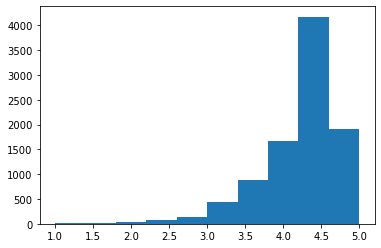

In [17]:
# The distribution of a continuous variable can be shown with a histogram

plt.hist(gostore['Rating'])

# What does the graph tell you about the distribution?

2. Next we can check distributions of independent variables. Let's try two variables: Reviews (numerical) and Category (categorical)

(array([1.0715e+04, 8.1000e+01, 1.9000e+01, 9.0000e+00, 0.0000e+00,
        5.0000e+00, 0.0000e+00, 3.0000e+00, 7.0000e+00, 2.0000e+00]),
 array([       0.        ,  7815830.6       , 15631661.2       ,
        23447491.8       , 31263322.4       , 39079153.        ,
        46894983.59999999, 54710814.2       , 62526644.8       ,
        70342475.39999999, 78158306.        ]),
 <BarContainer object of 10 artists>)

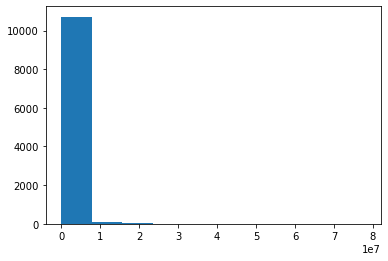

In [18]:
# The histogram for Reviews
plt.hist(gostore['Reviews'])
# What does the graph tell you about the distribution?

(array([1502., 1189., 1271., 1189., 1327., 1651., 1443.,  819.,  390.,
          60.]),
 array([ 0.        ,  1.81742469,  3.63484938,  5.45227407,  7.26969876,
         9.08712345, 10.90454814, 12.72197283, 14.53939752, 16.35682221,
        18.1742469 ]),
 <BarContainer object of 10 artists>)

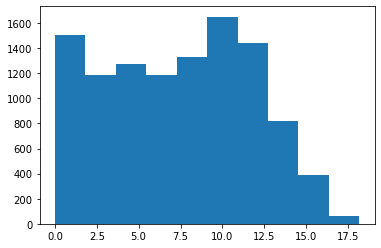

In [19]:
# With such highly skewed variable, we often take log of it. '+1' is to avoid taking log of 0.
# You may find the distribution of logged variable is less skewed.
plt.hist(np.log(gostore['Reviews']+1))

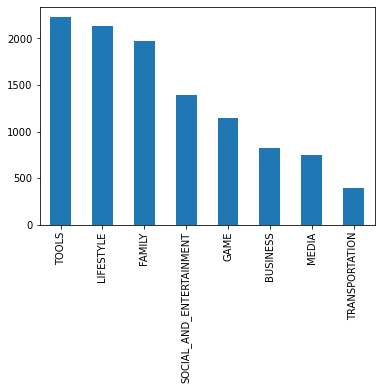

In [20]:
# The bar chart for Category
gostore['Category'].value_counts().plot(kind='bar');
# Which category has the most Apps

3. Then we can explore the relationships between variables. First let's examine the relationship between Rating and Size (both numerical). In other words, is there a correlation between Size and Rating? Scatterplot is the choice of graph.

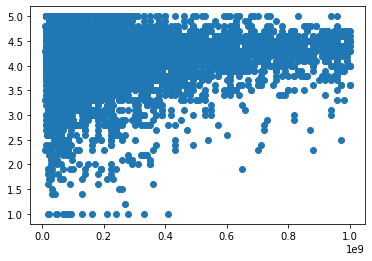

In [21]:
# scatter plot: x - Size; y - Rating
plt.scatter(gostore['Size'],gostore['Rating'])
# There seems not much correlation between the two variables.

4. We can also explore the relationship between Rating (numerical) and Category (categorical). In other words, do ratings vary by categories? <br>
Graphs we can use: <br>
    boxplots across different categories <br>
    subplots: a histogram of rating for each variable <br>

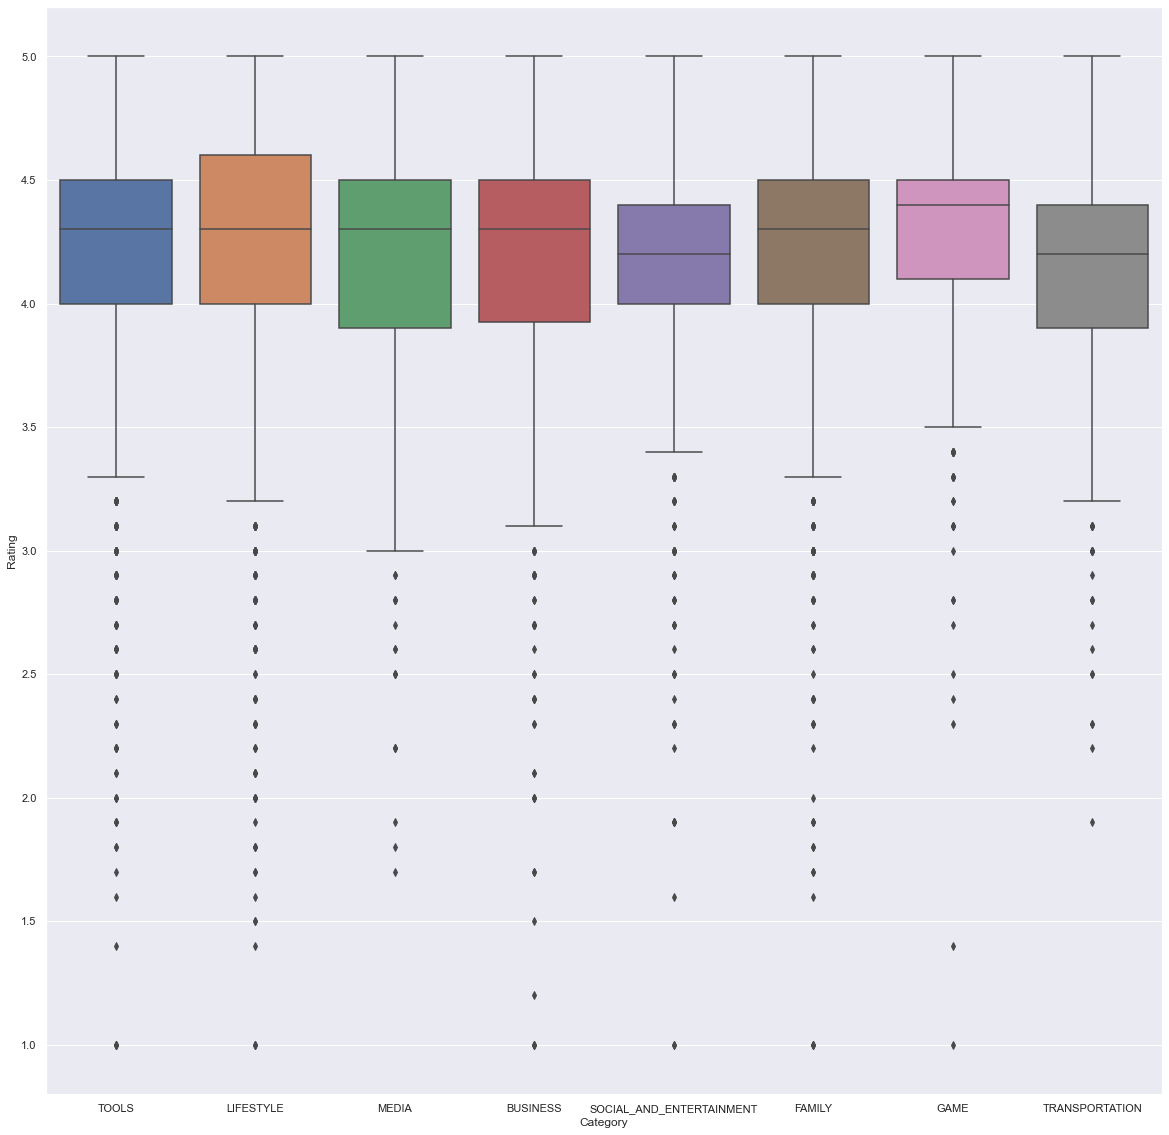

In [22]:
# We can use sns package, which is much easier to create subplots
import seaborn as sns
sns.set( rc = {'figure.figsize' : ( 20, 20 ), 'axes.labelsize' : 12 })
ax = sns.boxplot(x='Category', y='Rating', data=gostore)

# From the graph, we may infer: LIFESTYLE Apps seem to have more higher ratings; MEDIA_VIDEO ones seem not to be doing well.

5. Our Assignment will stop here. If you are doing this as a project, you will continue to examine other variables and relationships.

### Models and Analysis
    Next we apply two different prediction models to predict App ratings.

In [23]:
# For simplicity, we generate a cleaner dataset by selecting cleaned variables
gore = gostore[['App', 'Rating', 'Reviews', 'Type', 'Price', 'Content Rating', 
                        'Category', 'Recency', 'Min_API_level', 'Installs', 'Size']]

gore.isnull().sum()

App                  0
Rating            1474
Reviews              0
Type                 1
Price                0
Content Rating       0
Category             1
Recency              0
Min_API_level     1366
Installs             0
Size                 0
dtype: int64

In [36]:
gore['Rating'] = gore['Rating'].fillna(gore['Rating'].median()) # Since Rating is target variable, we can replace with median instead of just dropping

In [25]:
gore = gore.dropna()
gore.head()

,App,Rating,Reviews,Type,Price,Content Rating,Category,Recency,Min_API_level,Installs,Size
0,Test Application DT 02,4.3,0,Free,0.0,Everyone,TOOLS,539,14-20,0,12000000.0
1,Paper flowers instructions,4.4,167,Free,0.0,Everyone,TOOLS,527,5-10,50000,56000000.0
2,Dp for girls,4.2,175,Free,0.0,Everyone,TOOLS,466,14-20,50000,82000000.0
3,Easy Realistic Drawing Tutorial,4.1,223,Free,0.0,Everyone,TOOLS,378,5-10,100000,42000000.0
4,Garden Coloring Book,4.4,13791,Free,0.0,Everyone,TOOLS,349,11-13,1000000,330000000.0


In [26]:
# For the package ScikitLearn, we need to transform categorical variables to dummy variables first
# Transform the dummy variables; dropping one to get n-1 dummy variables for model fitting
dummy_cols =['Type', 'Content Rating', 'Category', 'Min_API_level']
gore = pd.get_dummies(gore, columns=dummy_cols, drop_first = True)
gore.head()

,App,Rating,Reviews,Price,Recency,Installs,Size,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,...,Category_LIFESTYLE,Category_MEDIA,Category_SOCIAL_AND_ENTERTAINMENT,Category_TOOLS,Category_TRANSPORTATION,Min_API_level_11-13,Min_API_level_14-20,Min_API_level_21-22,Min_API_level_23-26,Min_API_level_5-10
0,Test Application DT 02,4.3,0,0.0,539,0,12000000.0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,Paper flowers instructions,4.4,167,0.0,527,50000,56000000.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,Dp for girls,4.2,175,0.0,466,50000,82000000.0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,Easy Realistic Drawing Tutorial,4.1,223,0.0,378,100000,42000000.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,Garden Coloring Book,4.4,13791,0.0,349,1000000,330000000.0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [27]:
# Predict with a linear regression model
# generate the independent variable and dependent variable
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

X = gore.drop(['Rating','App'], axis = 1)
y = gore['Rating']

In [28]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [29]:
## generate train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [30]:
X_train.shape
X_test.shape

(6347, 23)

(3127, 23)

In [31]:
## fit linear model on training dataset
regressor = LinearRegression()
regressor.fit(X_train, y_train)
## predicting with the test dataset
y_prediction=regressor.predict(X_test)
y_prediction
y_prediction.shape

LinearRegression()

array([4.23133928, 4.20426086, 4.32646318, ..., 4.16725445, 4.21311072,
       4.16005482])

(3127,)

In [32]:
# Predict with a decision tree model
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size = 0.33, random_state = 0)


decision_treemodel = DecisionTreeRegressor(random_state=0)
decision_treemodel.fit(X_train_dt, y_train_dt)
y_prediction_dt=decision_treemodel.predict(X_test_dt)
y_prediction_dt
y_prediction_dt.shape

DecisionTreeRegressor(random_state=0)

array([4.6, 4.5, 4.5, ..., 4.1, 4. , 4.3])

(3127,)

The last step, we are going to evaluate the performance of the two models by comparing their RMSE (Root Mean Squared Error)

In [33]:
### Calculate RMSE of linear regression
from sklearn.metrics import mean_squared_error

rms_lr = mean_squared_error(y_prediction, y_test, squared=False)

In [34]:
### Calculate RMSE of Decision Tree
rms_dt = mean_squared_error(y_prediction_dt, y_test_dt, squared=False)

In [35]:
# Which model gives us smaller RMSE?
rms_lr
rms_dt

0.4713434678602659

0.6343371580101034

## Conclusions
We examine how we can predict ratings with App features. We cleaned the data and recoded variables for analysis. We explored the data with graphs. We used different models for prediction and obtain good results.
We find that most ratings are in the range between 4 and 5. It might suggest that Apps are in general good. Or there might be a selection bias: users are more likely to rate an App when they are happy about it. Our data cannot rule out this bias.
Higher number of installs does not necessarily suggest good ratings.
...
Our prediction results has an average MSE about 0.5 (I assume here). Assume the average of ratings is 4.0, the average error is about 12.5%. It is relatively good. The best model is ... We can use it to predict the performance of a new app and make suggestions.
(I made a simple conclusion here. You may expand with your results.)

# Reference
dataset: https://www.kaggle.com/lava18/google-play-store-apps
https://www.datacamp.com/community/tutorials/decision-tree-classification-python
https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market
https://en.wikipedia.org/wiki/Android_version_history#Version_history_by_API_level
https://www.kaggle.com/etatbak/nlp-google-store-reviews
https://datascienceplus.com/cross-validation-estimating-prediction-error/